In [ ]:
! pip install fuzzylogic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Using Sickit Fuzzy**

In [ ]:
import numpy as np
from matplotlib.pylab import *
import matplotlib.pyplot as plt

import skfuzzy as fuzz
import skfuzzy.membership as mf

from fuzzylogic.classes import rule_from_table
from fuzzylogic.hedges import plus, minus, very
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import R, S, alpha, triangular, trapezoid, rectangular, gauss, sigmoid, triangular_sigmoid, bounded_sigmoid,bounded_linear, linear

In [ ]:
#define inputs and output variable ranges with numpy
x_age = np.arange(0, 101, 1)
x_bloodPressure = np.arange(0, 221, 1)
x_cholesterol = np.arange(100, 251, 1)
x_bloodSugar = np.arange(0, 121, 1)
x_hdl = np.arange(0, 71, 1)
x_ldl = np.arange(0, 191, 1)
y_risk = np.arange(0, 46, 1)

NameError: ignored

In [ ]:
#prepare membership functions with linguistic qualifiers(Low, middle, high etc.) ranges
age_young = mf.trapmf(x_age, [-30, -5, 30, 40])
age_mid = mf.trapmf(x_age, [30, 40, 50, 60])
age_old = mf.trapmf(x_age, [50, 60, 100, 100])

bloodPressure_low = mf.trapmf(x_bloodPressure, [-30, -5, 100, 120])
bloodPressure_mid = mf.trapmf(x_bloodPressure, [100, 120, 140, 160])
bloodPressure_high = mf.trapmf(x_bloodPressure, [140, 160, 180, 200])
bloodPressure_veryHigh = mf.trapmf(x_bloodPressure, [180, 200, 220, 220])

cholesterol_low = mf.trapmf(x_cholesterol, [-30, -5, 180, 200])
cholesterol_mid = mf.trapmf(x_cholesterol, [180, 200, 220, 240])
cholesterol_high = mf.trapmf(x_cholesterol, [220, 240, 250, 270])

bloodSugar_veryHigh = mf.trimf(x_bloodSugar, [90, 120, 130])

hdl_low= mf.trapmf(x_hdl, [0, 0, 30, 40])
hdl_mid= mf.trapmf(x_hdl, [30, 40, 50, 60])
hdl_high= mf.trapmf(x_hdl, [50, 60, 80, 80])

ldl_normal= mf.trimf(x_ldl, [0, 0, 100,])
ldl_limit= mf.trimf(x_ldl, [100, 130, 160,])
ldl_high= mf.trimf(x_ldl, [130, 160, 190,])
ldl_veryHigh= mf.trapmf(x_ldl, [160, 190, 200, 200])

risk_not = mf.trapmf(y_risk, [0 ,0 ,5 ,10])
risk_little = mf.trapmf(y_risk, [5 ,10 ,15 ,20])
risk_mid = mf.trapmf(y_risk, [15 ,20 ,25 ,30])
risk_high = mf.trapmf(y_risk, [25 ,30 ,35 ,40])
risk_veryHigh = mf.trapmf(y_risk, [35, 40, 45, 50])

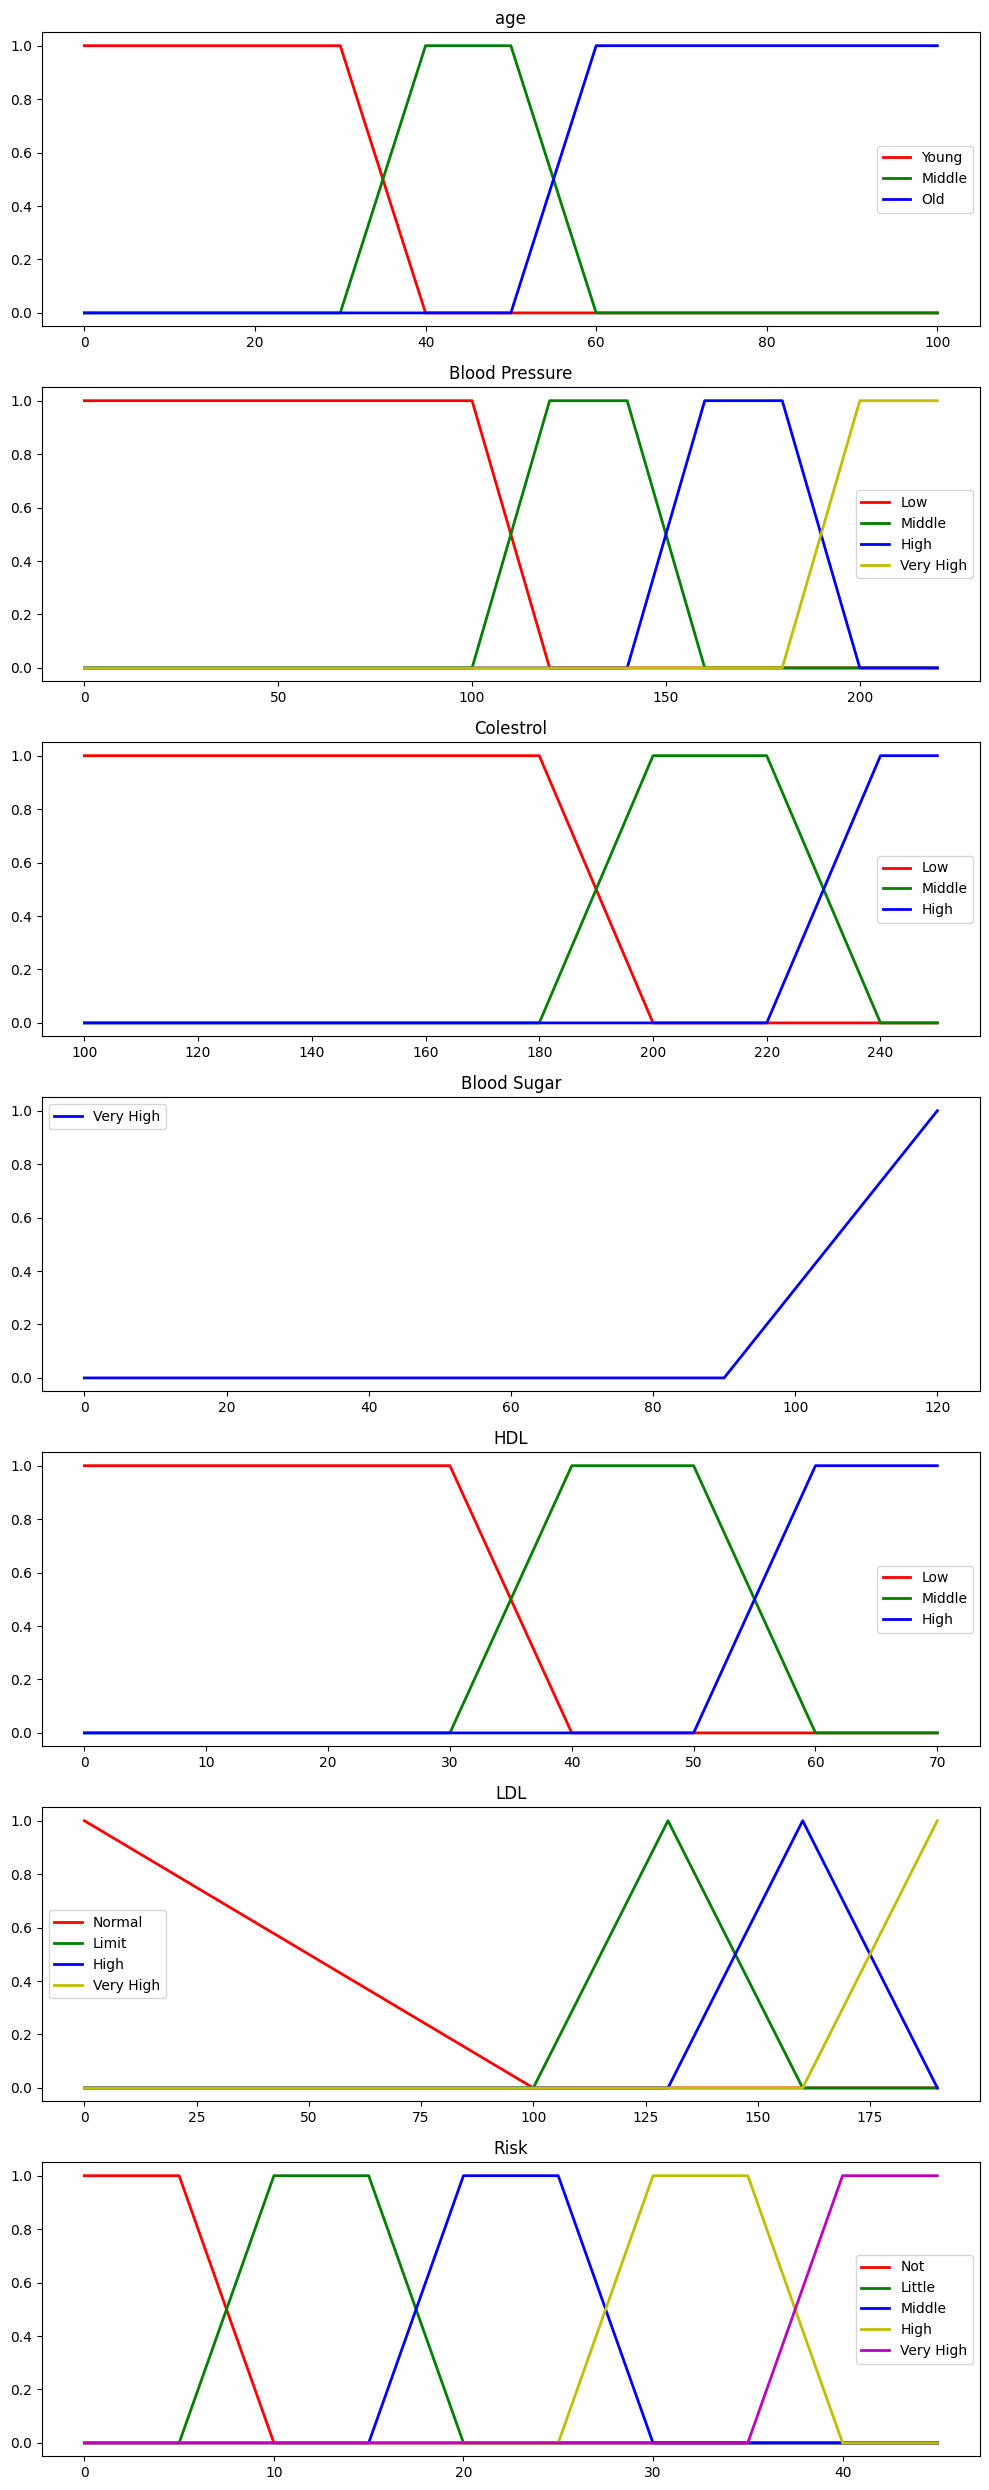

In [ ]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 7, figsize =(10, 25))

ax0.plot(x_age, age_young, 'r', linewidth = 2, label = 'Young')
ax0.plot(x_age, age_mid, 'g', linewidth = 2, label = 'Middle')
ax0.plot(x_age, age_old, 'b', linewidth = 2, label = 'Old')
ax0.set_title('age')
ax0.legend()

ax1.plot(x_bloodPressure, bloodPressure_low, 'r', linewidth = 2, label = 'Low')
ax1.plot(x_bloodPressure, bloodPressure_mid, 'g', linewidth = 2, label = 'Middle')
ax1.plot(x_bloodPressure, bloodPressure_high, 'b', linewidth = 2, label = 'High')
ax1.plot(x_bloodPressure, bloodPressure_veryHigh, 'y', linewidth = 2, label = 'Very High')
ax1.set_title('Blood Pressure')
ax1.legend()

ax2.plot(x_cholesterol, cholesterol_low, 'r', linewidth = 2, label = 'Low')
ax2.plot(x_cholesterol, cholesterol_mid, 'g', linewidth = 2, label = 'Middle')
ax2.plot(x_cholesterol, cholesterol_high, 'b', linewidth = 2, label = 'High')
ax2.set_title('Colestrol')
ax2.legend()

ax3.plot(x_bloodSugar, bloodSugar_veryHigh, 'b', linewidth = 2, label = 'Very High')
ax3.set_title('Blood Sugar')
ax3.legend()

ax4.plot(x_hdl, hdl_low, 'r', linewidth = 2, label = 'Low')
ax4.plot(x_hdl, hdl_mid, 'g', linewidth = 2, label = 'Middle')
ax4.plot(x_hdl, hdl_high, 'b', linewidth = 2, label = 'High')
ax4.set_title('HDL')
ax4.legend()

ax5.plot(x_ldl, ldl_normal, 'r', linewidth = 2, label = 'Normal')
ax5.plot(x_ldl, ldl_limit, 'g', linewidth = 2, label = 'Limit')
ax5.plot(x_ldl, ldl_high, 'b', linewidth = 2, label = 'High')
ax5.plot(x_ldl, ldl_veryHigh, 'y', linewidth = 2, label = 'Very High')
ax5.set_title('LDL')
ax5.legend()

ax6.plot(y_risk, risk_not, 'r', linewidth = 2, label = 'Not')
ax6.plot(y_risk, risk_little, 'g', linewidth = 2, label = 'Little')
ax6.plot(y_risk, risk_mid, 'b', linewidth = 2, label = 'Middle')
ax6.plot(y_risk, risk_high, 'y', linewidth = 2, label = 'High')
ax6.plot(y_risk, risk_veryHigh, 'm', linewidth = 2, label = 'Very High')
ax6.set_title('Risk')
ax6.legend()

plt.tight_layout()

In [ ]:
input_age = int(input("Age: "))
input_bloodPressure = int(input("Blood Pressure: "))
input_cholesterol = int(input("Cholesterol: "))
input_bloodSugar = int(input("Blood Sugar: "))
input_ldl = int(input("LDL (Low Density Lipoprotein): "))
input_hdl = int(input("HDL (High Density Lipoproteins): "))


Age: 71
Blood Pressure: 130
Cholesterol: 230
Blood Sugar: 145
LDL (Low Density Lipoprotein): 190
HDL (High Density Lipoproteins): 80


In [ ]:
#use skfuzzy library interpolation function for every linguistic qualifiers fuzzification
age_fit_young = fuzz.interp_membership(x_age, age_young, input_age)
age_fit_mid = fuzz.interp_membership(x_age, age_mid, input_age)
age_fit_old = fuzz.interp_membership(x_age, age_old, input_age)

bloodPressure_fit_low = fuzz.interp_membership(x_bloodPressure, bloodPressure_low, input_bloodPressure)
bloodPressure_fit_mid = fuzz.interp_membership(x_bloodPressure, bloodPressure_mid, input_bloodPressure)
bloodPressure_fit_high = fuzz.interp_membership(x_bloodPressure,bloodPressure_high , input_bloodPressure)
bloodPressure_fit_veryHigh = fuzz.interp_membership(x_bloodPressure, bloodPressure_veryHigh, input_bloodPressure)

cholesterol_fit_low = fuzz.interp_membership(x_cholesterol, cholesterol_low, input_cholesterol)
cholesterol_fit_mid = fuzz.interp_membership(x_cholesterol, cholesterol_mid, input_cholesterol)
cholesterol_fit_high = fuzz.interp_membership(x_cholesterol, cholesterol_high, input_cholesterol)

bloodSugar_fit_veryHigh = fuzz.interp_membership(x_bloodSugar, bloodSugar_veryHigh, input_bloodSugar)

ldl_fit_normal = fuzz.interp_membership(x_ldl, ldl_normal, input_ldl)
ldl_fit_limit = fuzz.interp_membership(x_ldl, ldl_limit, input_ldl)
ldl_fit_high = fuzz.interp_membership(x_ldl,ldl_high , input_ldl)
ldl_fit_veryHigh = fuzz.interp_membership(x_ldl, ldl_veryHigh, input_ldl)

hdl_fit_low = fuzz.interp_membership(x_hdl, hdl_low, input_hdl)
hdl_fit_mid = fuzz.interp_membership(x_hdl, hdl_mid, input_hdl)
hdl_fit_high = fuzz.interp_membership(x_hdl, hdl_high, input_hdl)


In [ ]:
#rule base numpy defines
rule1 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_normal), hdl_fit_high), risk_not)
rule2 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_limit), hdl_fit_high), risk_little)
rule3 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_high), hdl_fit_high), risk_mid)
rule4 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_low ,cholesterol_fit_low),ldl_fit_veryHigh), hdl_fit_high), risk_high)
rule5 = np.fmin(np.fmin(np.fmin(bloodPressure_fit_mid ,cholesterol_fit_low), hdl_fit_high), risk_not)

rule6 = np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_mid), cholesterol_fit_mid), risk_not)
rule7 = np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_mid), cholesterol_fit_mid), risk_not)
rule8 = np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_mid), cholesterol_fit_mid), risk_not)
rule9 = np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_high), cholesterol_fit_high), risk_mid)
rule10 = np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_high), cholesterol_fit_high), risk_high)
rule11 = np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_high), cholesterol_fit_high), risk_veryHigh)

rule12 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_mid), cholesterol_fit_low), ldl_fit_normal), hdl_fit_low), risk_not)
rule13 = np.fmin(np.fmin(age_fit_young, bloodSugar_fit_veryHigh), risk_little)
rule14 = np.fmin(np.fmin(age_fit_mid, bloodSugar_fit_veryHigh), risk_high)
rule15 = np.fmin(np.fmin(age_fit_old, bloodSugar_fit_veryHigh), risk_veryHigh)
rule16 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_normal), hdl_fit_high), risk_little)
rule17 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_normal), hdl_fit_high), risk_high)
rule18 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_normal), hdl_fit_high), risk_veryHigh)
rule19 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_low), cholesterol_fit_low), bloodSugar_fit_veryHigh), ldl_fit_veryHigh), hdl_fit_high), risk_veryHigh)

rule20 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_veryHigh, cholesterol_fit_high), ldl_fit_veryHigh), hdl_fit_high), risk_veryHigh)
rule21 = np.fmin(np.fmin(np.fmin(np.fmin(bloodPressure_fit_high, cholesterol_fit_high), ldl_fit_high), hdl_fit_mid), risk_veryHigh)
rule22 = np.fmin(np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young, bloodPressure_fit_veryHigh), cholesterol_fit_high), ldl_fit_veryHigh), hdl_fit_mid), risk_mid)
rule23 = np.fmin(np.fmin(age_fit_mid, bloodPressure_fit_veryHigh), risk_veryHigh)
rule24 = np.fmin(np.fmin(age_fit_old, bloodPressure_fit_veryHigh), risk_veryHigh)

In [ ]:
out_not = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule1,rule5),rule6),rule7),rule8),rule12)
out_little = np.fmax(np.fmax(rule2,rule13),rule16)
out_mid = np.fmax(np.fmax(rule3, rule9),rule22)
out_high = np.fmax(np.fmax(np.fmax(rule4, rule10),rule14),rule17)
out_veryHigh = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule11,rule15),rule18),rule19),rule20),rule21),rule23),rule24)

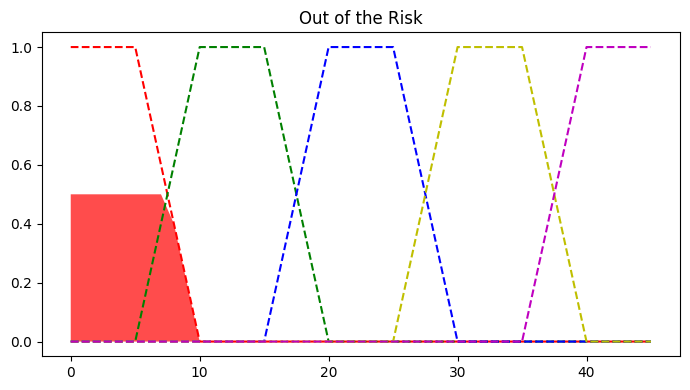

In [ ]:
risk0 = np.zeros_like(y_risk)

fig, ax0 = plt.subplots(figsize = (7, 4))
ax0.fill_between(y_risk, risk0, out_not, facecolor = 'r', alpha = 0.7)
ax0.plot(y_risk, risk_not, 'r', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_little, facecolor = 'g', alpha = 0.7)
ax0.plot(y_risk, risk_little, 'g', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_mid, facecolor = 'b', alpha = 0.7)
ax0.plot(y_risk, risk_mid, 'b', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_high, facecolor = 'y', alpha = 0.7)
ax0.plot(y_risk, risk_high, 'y', linestyle = '--')
ax0.fill_between(y_risk, risk0, out_veryHigh, facecolor = 'm', alpha = 0.7)
ax0.plot(y_risk, risk_veryHigh, 'm', linestyle = '--')
ax0.set_title('Out of the Risk')

plt.tight_layout()

In [ ]:
out_risk = np.fmax(np.fmax(np.fmax(np.fmax(out_not, out_little), out_mid), out_high), out_veryHigh)

defuzzified  = fuzz.defuzz(y_risk, out_risk, 'centroid')

result = fuzz.interp_membership(y_risk, out_risk, defuzzified)

print("Coroner Heart Diagnosis:", defuzzified)

Coroner Heart Diagnosis: 4.386973180076629


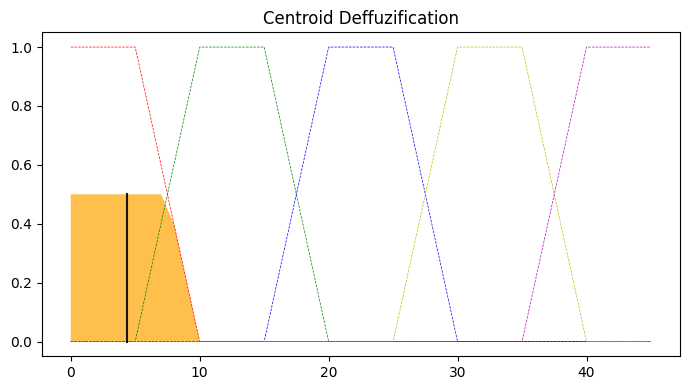

In [ ]:
fig, ax0 = plt.subplots(figsize=(7, 4))

ax0.plot(y_risk, risk_not, 'r', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_little, 'g', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_mid, 'b', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_high, 'y', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_veryHigh, 'm', linewidth = 0.5, linestyle = '--')

ax0.fill_between(y_risk, risk0, out_risk, facecolor = 'Orange', alpha = 0.7)
ax0.plot([defuzzified , defuzzified], [0, result], 'k', linewidth = 1.5, alpha = 0.9)
ax0.set_title('Centroid Deffuzification')

plt.tight_layout()

In [ ]:
out_risk = np.fmax(np.fmax(np.fmax(np.fmax(out_not, out_little), out_mid), out_high), out_veryHigh)

defuzzified  = fuzz.defuzz(y_risk, out_risk, 'bisector')

result = fuzz.interp_membership(y_risk, out_risk, defuzzified)

print("Coroner Heart Diagnosis:", defuzzified)

Coroner Heart Diagnosis: 4.35


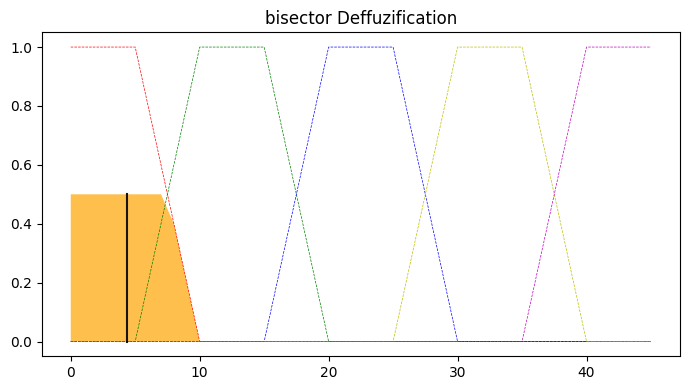

In [ ]:
fig, ax0 = plt.subplots(figsize=(7, 4))

ax0.plot(y_risk, risk_not, 'r', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_little, 'g', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_mid, 'b', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_high, 'y', linewidth = 0.5, linestyle = '--')
ax0.plot(y_risk, risk_veryHigh, 'm', linewidth = 0.5, linestyle = '--')

ax0.fill_between(y_risk, risk0, out_risk, facecolor = 'Orange', alpha = 0.7)
ax0.plot([defuzzified , defuzzified], [0, result], 'k', linewidth = 1.5, alpha = 0.9)
ax0.set_title('bisector Deffuzification')

plt.tight_layout()

# **Usinf Fuzzy Logic library**

In [ ]:
#define inputs and output variable ranges with numpy
x_age_fl = Domain("Age", 0, 101, res = 1)
x_bloodPressure_fl = Domain("Blood Pressure", 0, 221, res = 1)
x_cholesterol_fl = Domain("Cholestrol", 100, 251, res = 1)
x_bloodSugar_fl = Domain("Blood Sugar", 0, 121, res = 1)
x_hdl_fl = Domain("HDL", 0, 71, res = 1)
x_ldl_fl = Domain("LDL", 0, 191, res = 1)
y_risk_fl = Domain("Risk", 0, 46, res = 1)

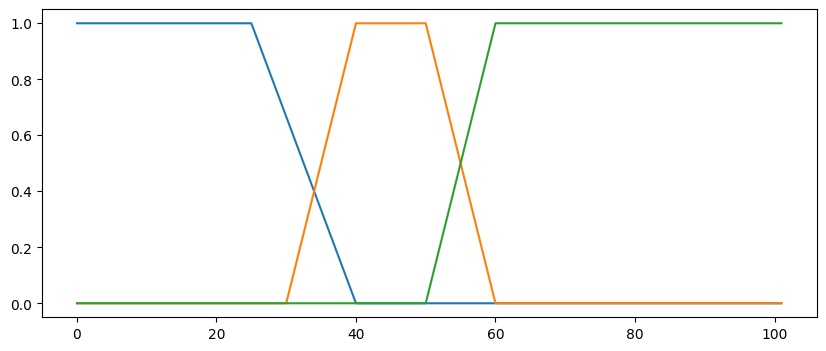

In [ ]:
fig, ax0 = plt.subplots(nrows = 1, figsize =(10, 4))

x_age_fl.young = trapezoid(-30,-5,25,40,c_m=1)
x_age_fl.middle = trapezoid(30, 40, 50, 60, c_m=1)
x_age_fl.old = R(50,60)
# x_age_fl.old = bounded_linear(50,60)
x_age_fl.young.plot()
x_age_fl.middle.plot()
x_age_fl.old.plot()

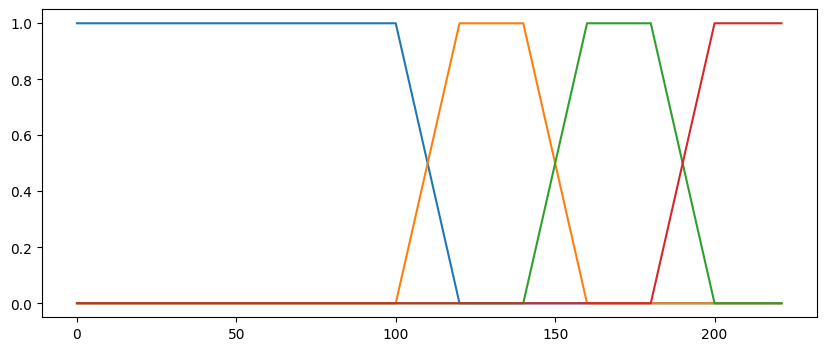

In [ ]:
fig = plt.subplots(nrows = 1, figsize =(10, 4))

x_bloodPressure_fl.low = trapezoid(-30,-5,100,120,c_m=1)
x_bloodPressure_fl.middle = trapezoid(100,120,140,160, c_m=1)
x_bloodPressure_fl.high=trapezoid(140,160,180,200,c_m=1)
x_bloodPressure_fl.veryhigh=R(180,200)
# x_bloodPressure_fl.veryhigh=bounded_linear(180,200)
x_bloodPressure_fl.low.plot()
x_bloodPressure_fl.middle.plot()
x_bloodPressure_fl.high.plot()
x_bloodPressure_fl.veryhigh.plot()

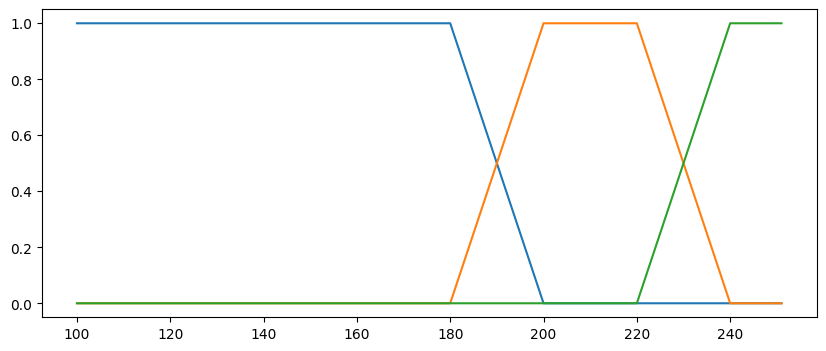

In [ ]:
fig = plt.subplots(nrows = 1, figsize =(10, 4))
x_cholesterol_fl.low = trapezoid(-30,-5,180,200)
x_cholesterol_fl.middle = trapezoid(180,200,220,240)
x_cholesterol_fl.high = R(220,240)
# x_cholesterol_fl.high = bounded_linear(220,240)
x_cholesterol_fl.low.plot()
x_cholesterol_fl.middle.plot()
x_cholesterol_fl.high.plot()

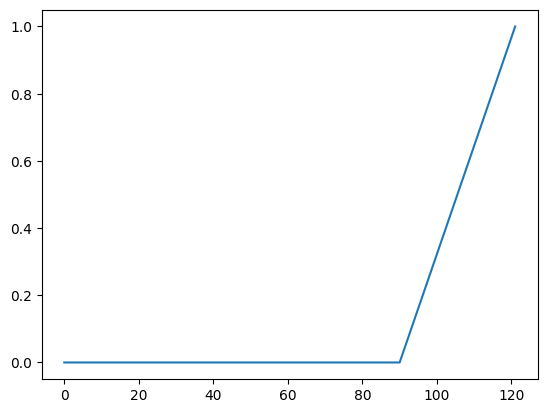

In [ ]:
x_bloodSugar_fl.veryhigh = R(90,121)
# x_bloodSugar_fl.veryhigh = bounded_linear(90,121)
x_bloodSugar_fl.veryhigh.plot()

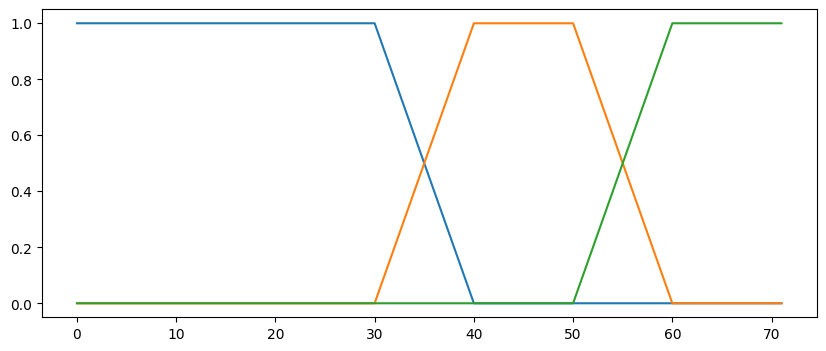

In [ ]:
fig = plt.subplots(nrows = 1, figsize =(10, 4))

x_hdl_fl.low = S(30, 40)
x_hdl_fl.middle = trapezoid(30,40,50,60)
x_hdl_fl.high = R(50, 60)
# x_hdl_fl.high = bounded_linear(50, 60)
x_hdl_fl.low.plot()
x_hdl_fl.middle.plot()
x_hdl_fl.high.plot()

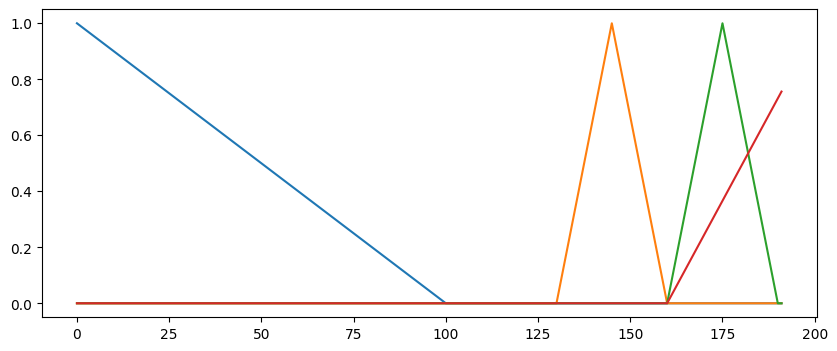

In [ ]:
fig = plt.subplots(nrows = 1, figsize =(10, 4))

x_ldl_fl.normal = S(0,100)
x_ldl_fl.limit = triangular(130,160)
x_ldl_fl.high  = triangular(160, 190)
x_ldl_fl.veryhigh =  R(160, 201)
# x_ldl_fl.veryhigh =  bounded_linear(160, 201)
x_ldl_fl.normal.plot()
x_ldl_fl.limit.plot()
x_ldl_fl.high.plot()
x_ldl_fl.veryhigh.plot()

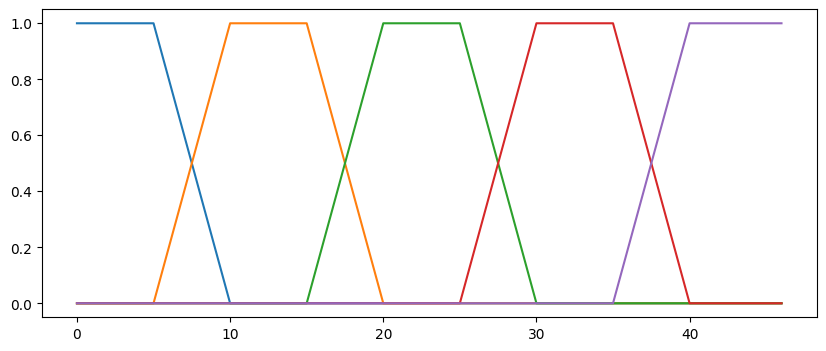

In [ ]:
fig = plt.subplots(nrows = 1, figsize =(10, 4))

y_risk_fl.Not = S(5,10)
y_risk_fl.little = trapezoid(5, 10, 15, 20)
y_risk_fl.middle = trapezoid(15, 20, 25, 30)
y_risk_fl.high = trapezoid(25, 30, 35, 40)
y_risk_fl.veryhigh = R(35, 40)
# y_risk_fl.veryhigh = bounded_linear(35, 40)
y_risk_fl.Not.plot()
y_risk_fl.little.plot()
y_risk_fl.middle.plot()
y_risk_fl.high.plot()
y_risk_fl.veryhigh.plot()

In [ ]:
input_age_fl = int(input("Age: "))
input_bloodPressure_fl = int(input("Blood Pressure: "))
input_cholesterol_fl = int(input("Cholesterol: "))
input_bloodSugar_fl = int(input("Blood Sugar: "))
input_ldl_fl = int(input("LDL (Low Density Lipoprotein): "))
input_hdl_fl = int(input("HDL (High Density Lipoproteins): "))

Age: 71
Blood Pressure: 130
Cholesterol: 230
Blood Sugar: 145


In [ ]:
age_fl_fit_young = x_age_fl.young(input_age_fl)
age_fl_fit_middle = x_age_fl.middle(input_age_fl)
age_fl_fit_old = x_age_fl.old(input_age_fl)

bloodPressure_fl_fit_low = x_bloodPressure_fl.low(input_bloodPressure_fl)
bloodPressure_fl_fit_middle = x_bloodPressure_fl.middle(input_bloodPressure_fl)
bloodPressure_fl_fit_high = x_bloodPressure_fl.high(input_bloodPressure_fl)
bloodPressure_fl_fit_veryhigh = x_bloodPressure_fl.veryhigh(input_bloodPressure_fl)

cholesterol_fl_fit_low = x_cholesterol_fl.low(input_cholesterol_fl)
cholesterol_fl_fit_middle = x_cholesterol_fl.middle(input_cholesterol_fl)
cholesterol_fl_fit_high = x_cholesterol_fl.high(input_cholesterol_fl)

bloodSugar_fl_fit_veryhigh = x_bloodSugar_fl.veryhigh(input_bloodSugar_fl)


hdl_fl_fit_low = x_hdl_fl.low(input_hdl_fl)
hdl_fl_fit_middle = x_hdl_fl.middle(input_hdl_fl)
hdl_fl_fit_high = x_hdl_fl.high(input_hdl_fl)

ldl_fl_fit_normal = x_ldl_fl.normal(input_ldl_fl)
ldl_fl_fit_limit = x_ldl_fl.limit(input_ldl_fl)
ldl_fl_fit_high  = x_ldl_fl.high(input_ldl_fl)
ldl_fl_fit_veryhigh = x_ldl_fl.veryhigh(input_ldl_fl)

In [ ]:
rule1_fl = Rule({(x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.normal, x_hdl_fl.high):y_risk_fl.Not})
rule2_fl = Rule({(x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.limit, x_hdl_fl.high): y_risk_fl.little})
rule3_fl = Rule({(x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.high, x_hdl_fl.high): y_risk_fl.middle})
rule4_fl = Rule({(x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.veryhigh, x_hdl_fl.high): y_risk_fl.high})
rule5_fl = Rule({(x_bloodPressure_fl.middle ,x_cholesterol_fl.low, x_hdl_fl.high): y_risk_fl.Not})

rule6_fl = Rule({(x_age_fl.young, x_bloodPressure_fl.middle, x_cholesterol_fl.middle): y_risk_fl.Not})
rule7_fl = Rule({(x_age_fl.middle, x_bloodPressure_fl.middle, x_cholesterol_fl.middle): y_risk_fl.Not})
rule8_fl = Rule({(x_age_fl.old, x_bloodPressure_fl.middle, x_cholesterol_fl.middle): y_risk_fl.Not})

rule9_fl = Rule({(x_age_fl.young, x_bloodPressure_fl.high, x_cholesterol_fl.high): y_risk_fl.middle})
rule10_fl = Rule({(x_age_fl.middle, x_bloodPressure_fl.high, x_cholesterol_fl.high): y_risk_fl.high})
rule11_fl = Rule({(x_age_fl.old, x_bloodPressure_fl.high, x_cholesterol_fl.high): y_risk_fl.veryhigh})

rule12_fl = Rule({(x_age_fl.young, x_bloodPressure_fl.middle, x_cholesterol_fl.low, x_ldl_fl.normal, x_hdl_fl.low): y_risk_fl.Not})
rule13_fl = Rule({(x_age_fl.young, x_bloodSugar_fl.veryhigh): y_risk_fl.little})
rule14_fl = Rule({(x_age_fl.middle, x_bloodSugar_fl.veryhigh): y_risk_fl.high})
rule15_fl = Rule({(x_age_fl.old, x_bloodSugar_fl.veryhigh): y_risk_fl.veryhigh})
rule16_fl = Rule({(x_age_fl.young, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.normal, x_hdl_fl.high): y_risk_fl.little})
rule17_fl = Rule({(x_age_fl.middle, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.normal, x_hdl_fl.high): y_risk_fl.high})
rule18_fl = Rule({(x_age_fl.old, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.normal, x_hdl_fl.high): y_risk_fl.veryhigh})
rule19_fl = Rule({(x_age_fl.middle, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.veryhigh, x_hdl_fl.high): y_risk_fl.veryhigh})

rule20_fl = Rule({(x_bloodPressure_fl.veryhigh, x_cholesterol_fl.high, x_ldl_fl.veryhigh, x_hdl_fl.high): y_risk_fl.veryhigh})
rule21_fl = Rule({(x_bloodPressure_fl.high, x_cholesterol_fl.high, x_ldl_fl.high, x_hdl_fl.middle): y_risk_fl.veryhigh})
rule22_fl = Rule({(x_age_fl.young, x_bloodPressure_fl.veryhigh, x_cholesterol_fl.high, x_ldl_fl.veryhigh, x_hdl_fl.middle): y_risk_fl.middle})
rule23_fl = Rule({(x_age_fl.middle, x_bloodPressure_fl.veryhigh): y_risk_fl.veryhigh})
rule24_fl = Rule({(x_age_fl.old, x_bloodPressure_fl.veryhigh): y_risk_fl.veryhigh})

In [ ]:
# rules = Rule({(x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.normal, x_hdl_fl.high):y_risk_fl.Not,
#           (x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.limit, x_hdl_fl.high): y_risk_fl.little,
#           (x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.high, x_hdl_fl.high): y_risk_fl.middle,
#           (x_bloodPressure_fl.low ,x_cholesterol_fl.low,x_ldl_fl.veryhigh, x_hdl_fl.high): y_risk_fl.high,
#           (x_bloodPressure_fl.middle ,x_cholesterol_fl.low, x_hdl_fl.high): y_risk_fl.Not,
#           (x_age_fl.young, x_bloodPressure_fl.middle, x_cholesterol_fl.middle): y_risk_fl.Not,
#           (x_age_fl.middle, x_bloodPressure_fl.middle, x_cholesterol_fl.middle): y_risk_fl.Not,
#           (x_age_fl.old, x_bloodPressure_fl.middle, x_cholesterol_fl.middle): y_risk_fl.Not,
#           (x_age_fl.young, x_bloodPressure_fl.high, x_cholesterol_fl.high): y_risk_fl.middle,
#           (x_age_fl.middle, x_bloodPressure_fl.high, x_cholesterol_fl.high): y_risk_fl.high,
#           (x_age_fl.old, x_bloodPressure_fl.high, x_cholesterol_fl.high): y_risk_fl.veryhigh,
#           (x_age_fl.young, x_bloodPressure_fl.middle, x_cholesterol_fl.low, x_ldl_fl.normal, x_hdl_fl.low): y_risk_fl.Not,
#           (x_age_fl.young, x_bloodSugar_fl.veryhigh): y_risk_fl.little,
#           (x_age_fl.middle, x_bloodSugar_fl.veryhigh): y_risk_fl.high,
#           (x_age_fl.old, x_bloodSugar_fl.veryhigh): y_risk_fl.veryhigh,
#           (x_age_fl.young, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.normal, x_hdl_fl.high): y_risk_fl.little,
#           (x_age_fl.middle, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.normal, x_hdl_fl.high): y_risk_fl.high,
#           (x_age_fl.old, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.normal, x_hdl_fl.high): y_risk_fl.veryhigh,
#           (x_age_fl.middle, x_bloodPressure_fl.low, x_cholesterol_fl.low, x_bloodSugar_fl.veryhigh, x_ldl_fl.veryhigh, x_hdl_fl.high): y_risk_fl.veryhigh,
#           (x_bloodPressure_fl.veryhigh, x_cholesterol_fl.high, x_ldl_fl.veryhigh, x_hdl_fl.high): y_risk_fl.veryhigh,
#           (x_bloodPressure_fl.high, x_cholesterol_fl.high, x_ldl_fl.high, x_hdl_fl.middle): y_risk_fl.veryhigh,
#           (x_age_fl.young, x_bloodPressure_fl.veryhigh, x_cholesterol_fl.high, x_ldl_fl.veryhigh, x_hdl_fl.middle): y_risk_fl.middle,
#           (x_age_fl.middle, x_bloodPressure_fl.veryhigh): y_risk_fl.veryhigh,
#           (x_age_fl.old, x_bloodPressure_fl.veryhigh): y_risk_fl.veryhigh})

In [ ]:
rules = rule1_fl | rule2_fl | rule3_fl | rule4_fl | rule5_fl | rule6_fl | rule7_fl |rule8_fl | rule9_fl | rule10_fl | rule11_fl | rule12_fl | rule13_fl | rule14_fl | rule15_fl | rule16_fl | rule17_fl | rule18_fl | rule19_fl | rule20_fl | rule21_fl | rule22_fl | rule23_fl | rule24_fl
# rules = sum([rule1_fl, rule2_fl, rule3_fl, rule4_fl, rule5_fl, rule6_fl, rule7_fl, rule8_fl,
#               rule9_fl, rule10_fl, rule11_fl, rule12_fl, rule13_fl, rule14_fl, rule15_fl, rule16_fl,
#               rule17_fl, rule18_fl, rule19_fl, rule20_fl, rule21_fl, rule22_fl, rule23_fl, rule24_fl])


In [ ]:
values = {x_age_fl: input_age_fl, x_bloodPressure_fl: input_bloodPressure_fl, x_cholesterol_fl: input_cholesterol_fl, x_bloodSugar_fl: input_bloodSugar_fl, x_ldl_fl: input_ldl_fl, x_hdl_fl: input_hdl_fl}

In [ ]:
print(y_risk_fl.Not(rules(values)))
print(y_risk_fl.little(rules(values)))
print(y_risk_fl.middle(rules(values)))
print(y_risk_fl.high(rules(values)))
print(y_risk_fl.veryhigh(rules(values)))
print(y_risk_fl(rules(values)))
print(rules(values))

In [ ]:
1